In [118]:
import tensorflow as tf;
import numpy as np
import matplotlib.pyplot as plt


In [119]:
img = tf.image.decode_jpeg(tf.io.read_file('../kaggle/cat-and-dog/training_set/dogs/dog.66.jpg'))

In [120]:
img.shape

TensorShape([397, 499, 3])

In [121]:
def draw_ab(images, boxes):
    images = tf.cast(images, dtype='float32')
    if len(images.shape) == 3:
        images = tf.reshape(images, shape=(1, *images.shape))
    if len(boxes.shape) == 1:
        boxes = tf.reshape(boxes, shape=(1, 1, *boxes.shape))
    elif len(boxes.shape) == 2:
        boxes = tf.reshape(boxes, shape=(1, *boxes.shape))
    colors = tf.random.uniform(shape=(*boxes.shape[:2], 4), minval=0, maxval=255, dtype='float32')
    colors = tf.reshape(colors, (-1, 4))
    return tf.image.draw_bounding_boxes(images=images, boxes=boxes, colors=colors)

def im_show(images):
    [plt.imshow(tf.cast(images[i], dtype='int32')) for i in range(len(images))]

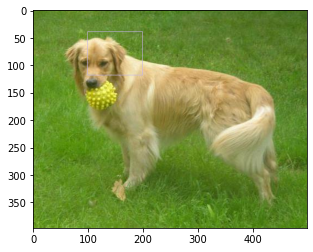

In [122]:
boxed = draw_ab(img, tf.constant([0.1,0.2,0.3,0.4], dtype='float32'))
im_show(boxed)

In [123]:
def get_all_boxes(img, scales, ratios):
    img = tf.cast(img, dtype='float32')
    # output.shape: (pixel_h, pixel_w, n_boxes_per_pixel, box) 

    pairs = [(scales[0], np.sqrt(ratio)) for ratio in ratios]
    pairs += [(scale, np.sqrt(ratios[0])) for scale in scales]
    pairs = tf.constant(pairs, dtype='float32')
    pairs = tf.transpose(pairs)
    # scales = tf.constant(scales, dtype='float32')
    # ratios = tf.constant(ratios, dtype='float32')
    
    # 取出图片的宽高
    img_h, img_w, _ = img.shape
    n_boxes_per_pixel = len(scales) + len(ratios) - 1
    
    # 397 * 1
    boxes_center_h = tf.expand_dims((tf.constant(tf.range(img_h, dtype='float32'), dtype='float32') + .5) * 1. / img_h, axis=-1)
    # 499 * 1
    boxes_center_w = tf.expand_dims((tf.constant(tf.range(img_w, dtype='float32'), dtype='float32') + .5) * 1. / img_w, axis=-1)
    
    # 397 * 1
    boxes_h = tf.matmul(boxes_center_h, tf.expand_dims(pairs[0, :], axis=0)) * pairs[1, :] / 2
    # 499 * 1
    boxes_w = tf.matmul(boxes_center_w, tf.expand_dims(pairs[0, :], axis=0)) * pairs[1, :] / 2

    left_top_h = boxes_center_h - boxes_h
    left_top_w =  boxes_center_w - boxes_w
    right_bottom_h = boxes_center_h + boxes_h
    right_bottom_w = boxes_center_w + boxes_w
    lt_h, lt_w = tf.meshgrid(left_top_h, left_top_w)

    lt = tf.stack([lt_h, lt_w], axis=-1)
    
    rb_h, rb_w = tf.meshgrid(right_bottom_h, right_bottom_w)
    
    rb = tf.stack([rb_h, rb_w], axis=-1)
    
    boxes = tf.concat([lt, rb], axis=-1)
    
    print(boxes.shape)
    
    # tf.concat()
    
    
    

In [124]:
get_all_boxes(img=img, scales=[.5, .75, .25, 1], ratios=[.5, .75, .25])

(3493, 2779, 4)
